In [17]:
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
import sklearn
from sklearn.mixture import GaussianMixture

In [3]:
data = np.load('/Users/lorenzaimpicicche/Desktop/astrostatistics_bicocca_2025/working/formationchannels.npy')

In [4]:
data

array([[17.12172682],
       [ 5.94121793],
       [ 6.35914124],
       ...,
       [34.34170191],
       [30.27018478],
       [25.93264098]], shape=(2950, 1))

(array([  1.,   0.,   1.,   1.,   1.,   0.,   2.,   3.,   2.,   1.,   4.,
          1.,   3.,   7.,   6.,  11.,   4.,  11.,   9.,  15.,  13.,   9.,
         11.,  19.,  19.,  11.,  16.,  17.,  19.,  12.,  14.,  14.,   9.,
         15.,  13.,   4.,  12.,  10.,   3.,   5.,   8.,  14.,  23.,  40.,
         72., 117., 145., 129., 104.,  51.,  38.,  26.,  48.,  44.,  47.,
         47.,  51.,  73.,  59.,  80.,  69.,  75.,  78.,  85.,  82.,  88.,
         86.,  84.,  80.,  71.,  87.,  58.,  57.,  65.,  49.,  48.,  32.,
         33.,  32.,  26.,  34.,  17.,  15.,  14.,  11.,  12.,   2.,   6.,
          0.,   1.,   2.,   2.,   2.,   0.,   1.,   0.,   0.,   1.,   0.,
          1.]),
 array([-4.965425  , -4.42875831, -3.89209161, -3.35542492, -2.81875822,
        -2.28209152, -1.74542483, -1.20875813, -0.67209144, -0.13542474,
         0.40124195,  0.93790865,  1.47457534,  2.01124204,  2.54790873,
         3.08457543,  3.62124212,  4.15790882,  4.69457551,  5.23124221,
         5.7679089 ,  6.30

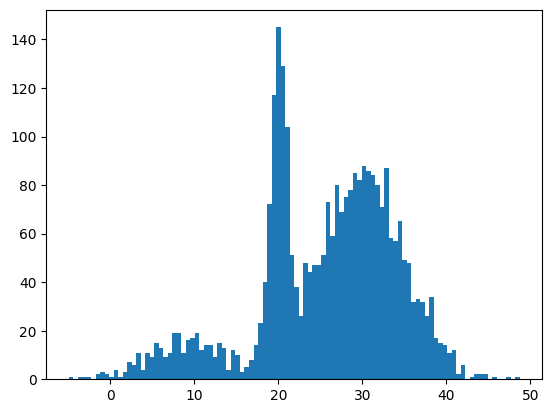

In [14]:
plt.hist(data, bins=100)

In [32]:
gm = GaussianMixture(n_components=3, random_state=0).fit(data)
log=gm.score(data)

In [29]:
x=np.linspace(0,50, 100000)

#y = 0.2*pdf(gm.means_[0],x) + 0.3*pdf(gm.means_[1],x) + 0.5*pdf(gm.means_[2],x);
#plot(x,y)

In [34]:
a=np.exp(log)
a

np.float64(0.03333195142128791)

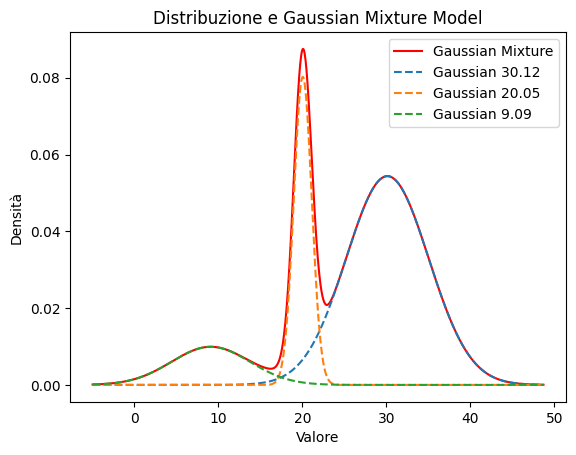

In [35]:
# Creare un range di valori per plottare le Gaussiane
x = np.linspace(min(data), max(data), 1000).reshape(-1, 1)

# Calcolare la densità della mixture
gmm_pdf = np.exp(gm.score_samples(x))

# Plottare la distribuzione risultante
plt.plot(x, gmm_pdf, color='red', label='Gaussian Mixture')

# Plottare le singole Gaussiane
for mean, cov, weight in zip(gm.means_.flatten(), gm.covariances_.flatten(), gm.weights_):
    single_gauss = weight * np.exp(-0.5 * ((x - mean) ** 2) / cov) / np.sqrt(2 * np.pi * cov)
    plt.plot(x, single_gauss, linestyle="dashed", label=f'Gaussian {mean:.2f}')

plt.legend()
plt.xlabel('Valore')
plt.ylabel('Densità')
plt.title('Distribuzione e Gaussian Mixture Model')
plt.show()